# Iris Dataset Analysis - Sklearn Pipeline Demonstration

## Goal: To build and demonstrate sklearn pipelines for data preprocessing and modelling


### Context:


Most machine learning models require us to perform several data preprocessing steps such as feature scaling, PCA etc. before actually training the model on the data. This leads to a writing a lot of code lines that when written sequentially look messy and the overall approach is not the best in terms readability. 
<br />
Machine learning pipelines can be very handy in this case as they enable a user to write and organize cleaner looking code and help with the ease of understanding. Also, when new data is introduced, the pipeline automatically performs all the necessary pre processing steps before training the model on the new data for further prediction - thereby iterating and automating all the processing steps
<br />
We will be using the iris flower dataset from the sklearn library in order to demonstrate a machine learning pipeline in this notebook and predict the species of the flower

### About the dataset

**Dataset** : Iris Dataset
<br /> **Attribute Information:**


* **Id** - SPL-SPW-PTL-PTW(CM)
* **SepalLengthCm** - Length of the sepal (in cm)
* **SepalWidthCm** - Width of the sepal (in cm)
* **PetalLengthCm** - Length of the petal (in cm)
* **PetalWidthCm** - Width of the petal (in cm)
* **Species** - Species name

## Machine learning/Data Science Pipeline
* Importing all required libraries
* Loading/Importing the dataset
* Data Exploration
* Splitting the data into training and test datasets
* Creating Pipelines
* Model Comparison/Interpreting the results

### - Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### - Loading/Importing the dataset
* We will import the dataset from the sci-kit learn library

In [2]:
data = pd.read_csv(r"C:\Users\aashi\Desktop\Data Scientist\datasets\Iris.csv")

### - Data Exploration

In [3]:
#shape of data and reading the first 3 rows
data.shape

(150, 6)

* the data has 6 variables with 150 observations


In [4]:
#reading first 3 rows
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
#checking datatypes of all the variables
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
#missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* It looks like there are no null values in any of the features. Now we will look at running some descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


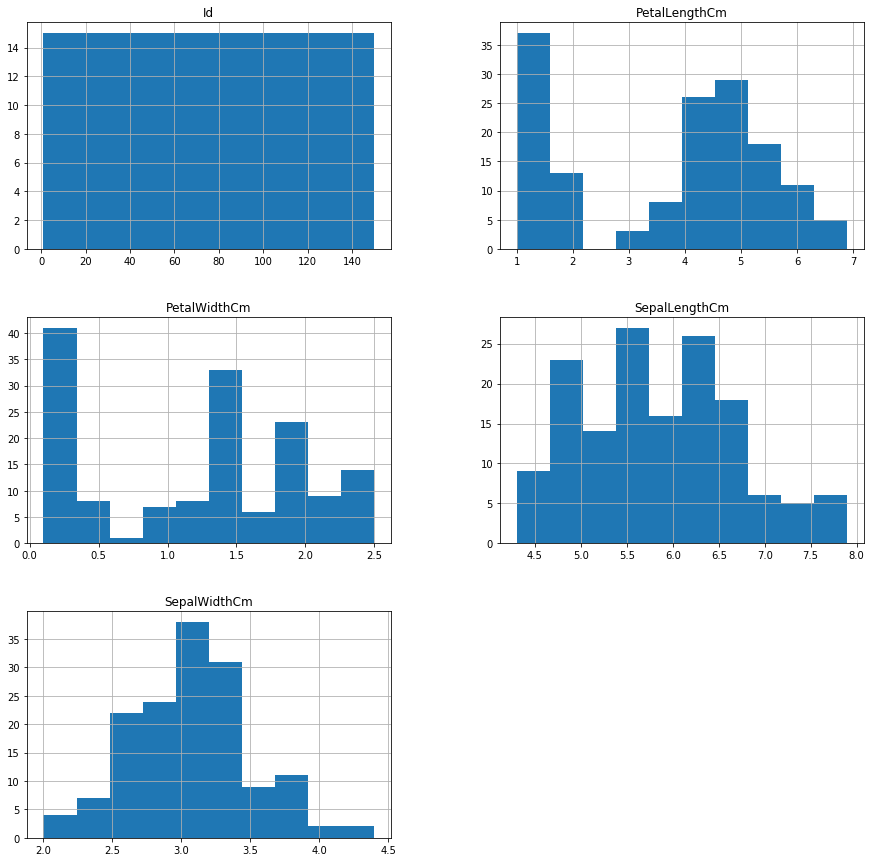

In [7]:
#running descriptive statistics on all numerical variables
p=data.hist(figsize = (15,15))
data.describe().transpose()

We can drop the column "id" since it does not provide any useful information for our model(s)

In [8]:
#dropping unnecessary columns
data.drop(['Id'],axis=1, inplace=True)

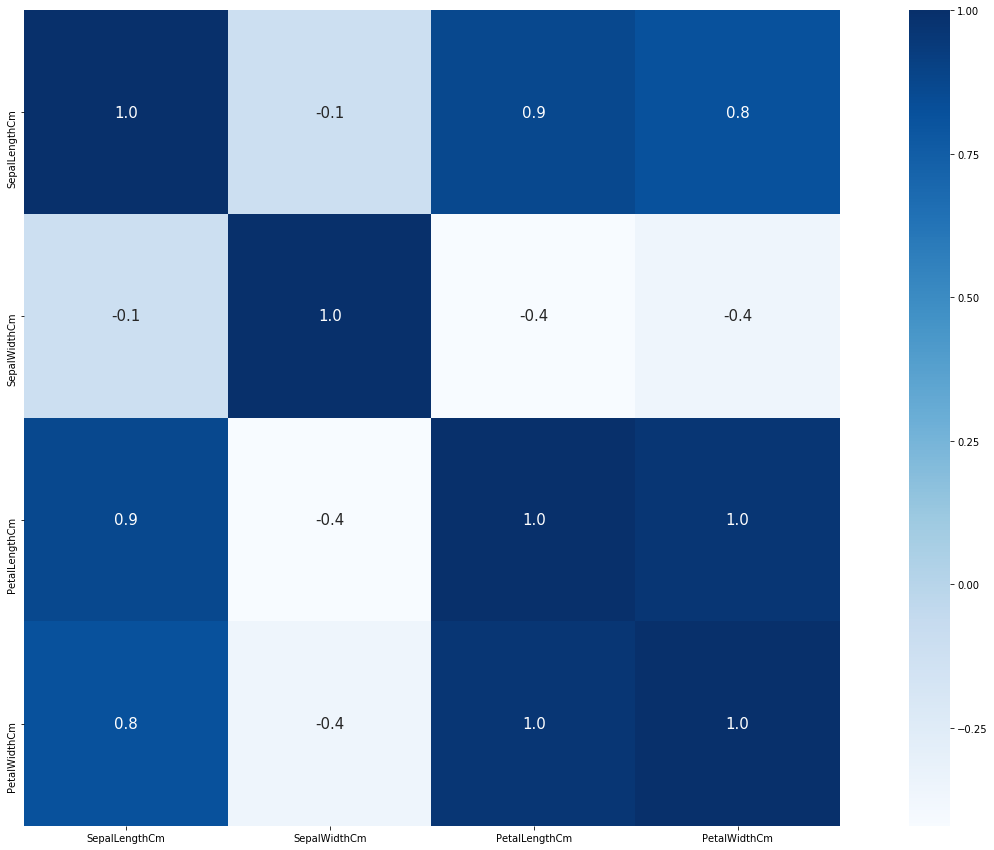

In [9]:
#correlation matrix to check for dependencies

corr = data.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

* Correlation is a statistical measure that explains how one or more numerical variables are related to each other. It is used to check for linear dependencies between the independent variables/features of the data. 
* Two features are said to be positively correlated with each other if increase in the value of one variable results in the proportional increase in the value of the other. 
* Correlation coefficient can have a value in the range of -1.0 to 1.0. A value of 0 indicates that there is no correlation between the variables

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


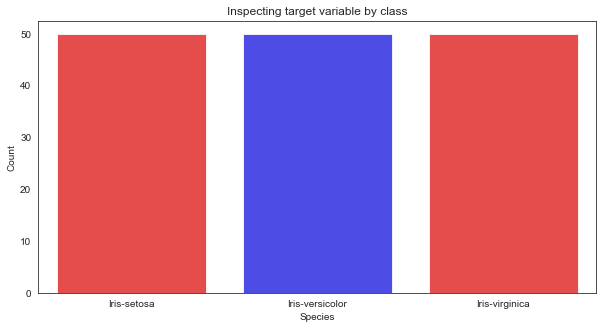

In [10]:
#count by classes
print(data['Species'].value_counts())
#target variable countplot
sns.set_style('white')
plt.figure(figsize = (10,5))
sns.countplot(data['Species'], alpha =.80, palette= ['red','blue'])
plt.title('Inspecting target variable by class')
plt.ylabel('Count')
plt.show()


### - Splitting the data into training and test datasets

In [11]:
#creating dataframes from target variable and features
X = data.drop(['Species'], axis = 1)
y = data['Species']

In [12]:
#splitting the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

### - Creating Pipelines

* We will now create scikit learn pipelines that will perform all the data pre processing, dimensionality reduction and then fit the various classification models on the training set. 
* For the purpose of this project we will be implementing the following ML algorithms for classification, each in a seperate pipeline

    1. Logistic Regression
    2. Decision Tree
    3. Random Forest

In [13]:
#Logistic Regression pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [14]:
#Decision Tree pipeline
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [15]:
#Random Forest pipeline
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

* Note that the model will fit and transform the training data with repsect to the first 2 elements i.e. StandardScaler and PCA but will only fit the data for the third element which is the classifier

In [16]:
#list of all pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [17]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### - Model Comparison

In [18]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

#model comparison and evaluating model performance
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.8666666666666667
Decision Tree Test Accuracy: 0.9111111111111111
RandomForest Test Accuracy: 0.9333333333333333


It can be seen that Random Forest algorithm yields the highest accuracy for this dataset

# THE END